In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [47]:
data = pd.read_csv('/content/drive/MyDrive/Data Set /Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 1- Explore Data

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [49]:
data.shape

(200, 5)

In [50]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [52]:
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
188,189,Female,41,103,17
46,47,Female,50,40,55
30,31,Male,60,30,4


In [53]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [54]:
data.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [55]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 2- Transform Data

In [56]:
la = LabelEncoder()
data.Gender = la.fit_transform(data.Gender)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## 3- Creat Module

In [57]:
model = KMeans(n_clusters = 5)
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [58]:
model.inertia_

157141.33959373954

In [59]:
clustersn = []
j = []

for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(data)
    clustersn.append(i)
    j.append(model.inertia_)


pd.DataFrame({"clusters":clustersn,"j":j})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,clusters,j
0,1,975512.060000
1,2,387065.713771
2,3,271384.508783
3,4,195401.198560
4,5,157505.720725
5,6,122628.062406
6,7,105756.556476
7,8,86053.674448
8,9,76917.615882
9,10,69372.528397


Text(0, 0.5, 'y')

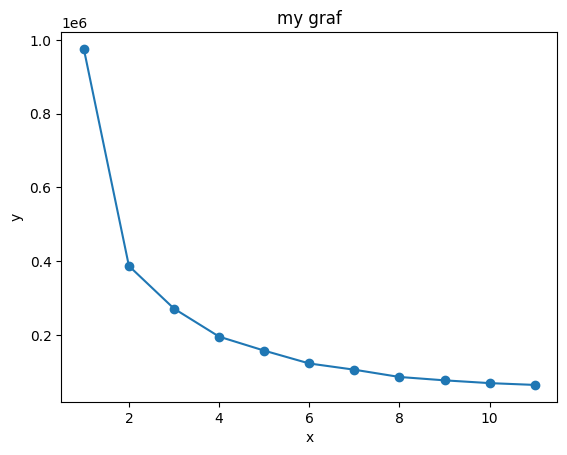

In [60]:
plt.plot(clustersn,j,marker = 'o')
plt.title('my graf')
plt.xlabel('x')
plt.ylabel('y')

In [61]:
model = KMeans(n_clusters = 4)
model.fit(data)
pre = model.predict(data)
pre

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [62]:
data['k_mean'] = pre
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,1
197,198,1,32,126,74,3
198,199,1,32,137,18,1


In [63]:
df1 = data[data['k_mean'] == 0]
df2 = data[data['k_mean'] == 1]
df3 = data[data['k_mean'] == 2]
df4 = data[data['k_mean'] == 3]

In [64]:
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
5,6,0,22,17,76,0
6,7,0,35,18,6,0
7,8,0,23,18,94,0
8,9,1,64,19,3,0
9,10,0,30,19,72,0


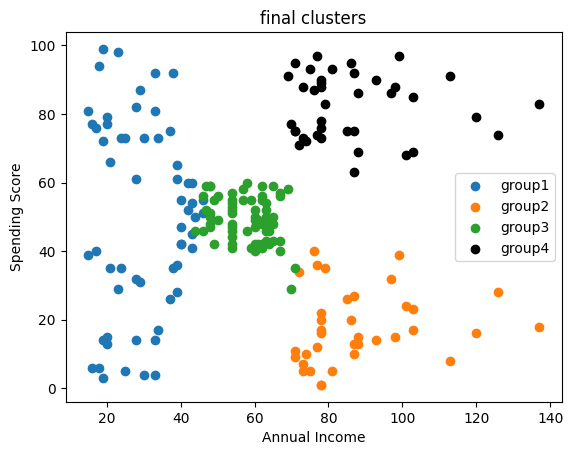

In [65]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4',color='black')
plt.title('final clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

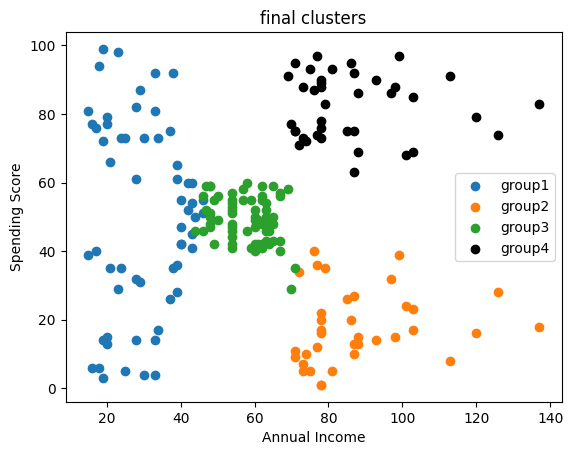

In [66]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4',color='black')
plt.title('final clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

## 4- Data Analysis

<Axes: ylabel='count'>

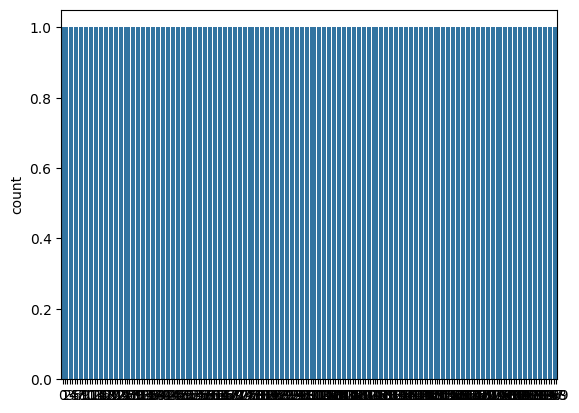

In [67]:
sns.countplot(data.k_mean)

In [68]:
data.k_mean.value_counts()

2    66
0    59
3    39
1    36
Name: k_mean, dtype: int64

<Axes: ylabel='k_mean'>

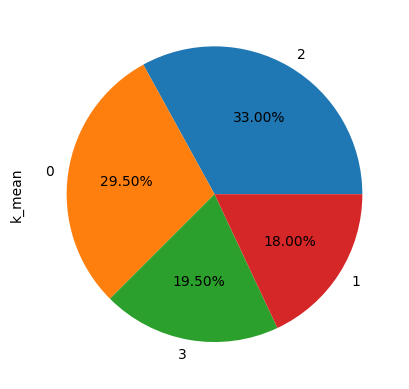

In [69]:
data.k_mean.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='k_mean', ylabel='Spending Score (1-100)'>

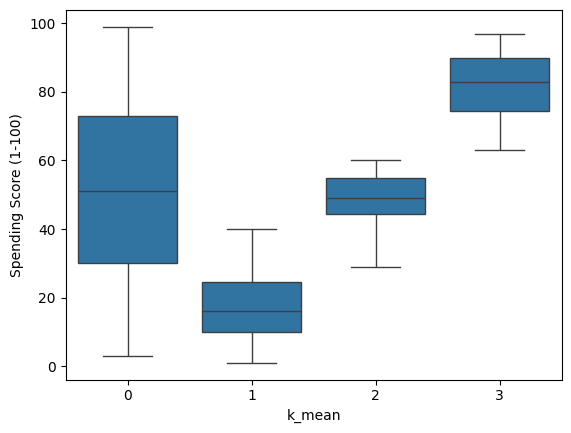

In [70]:
sns.boxplot(x='k_mean', y='Spending Score (1-100)', data=data)

<Axes: xlabel='k_mean', ylabel='count'>

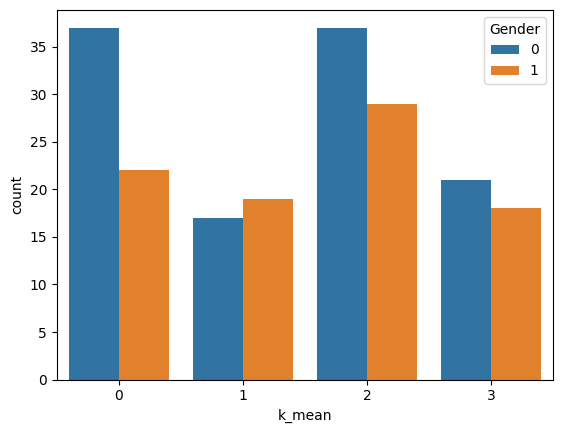

In [71]:
sns.countplot(x=data.k_mean,hue=data.Gender)

<Axes: xlabel='Gender', ylabel='count'>

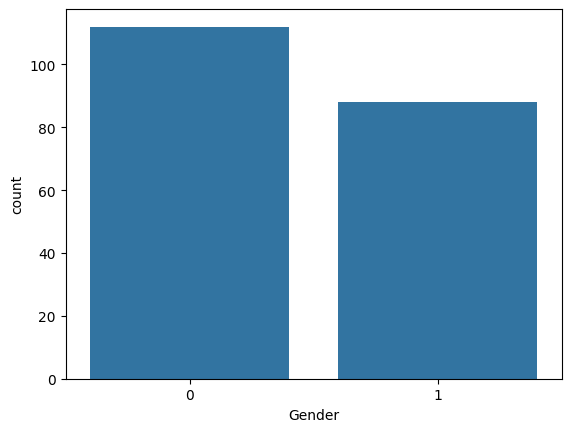

In [72]:
sns.countplot(data = data,x='Gender')

<Axes: >

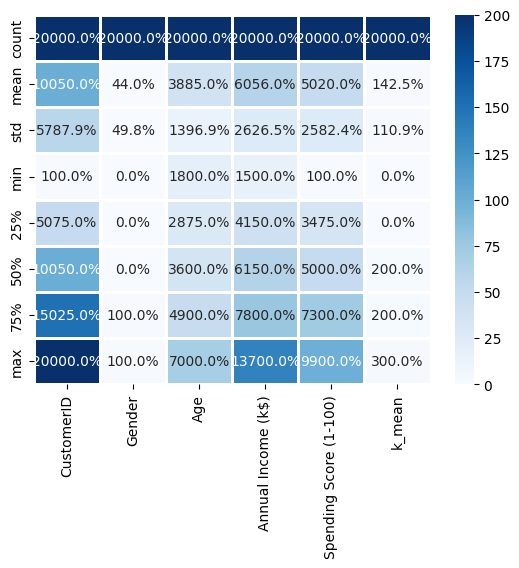

In [73]:
sns.heatmap(data.describe(),annot = True, fmt = "0.1%" ,linewidth = 1 , cmap = "Blues")

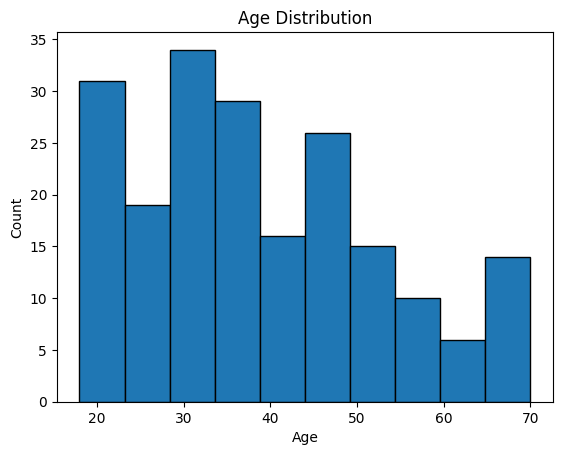

In [74]:
plt.hist(data['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


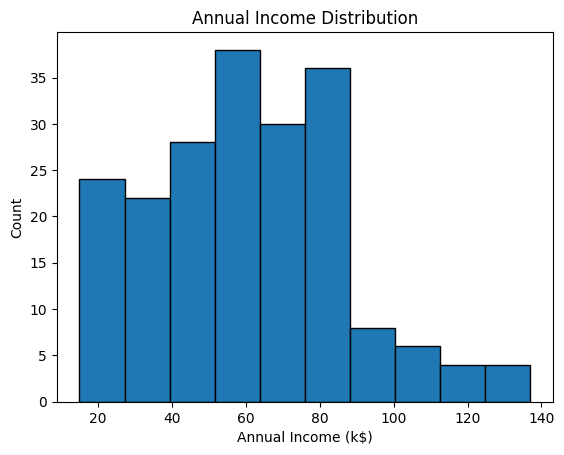

In [75]:
plt.hist(data['Annual Income (k$)'], bins=10, edgecolor='black')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()


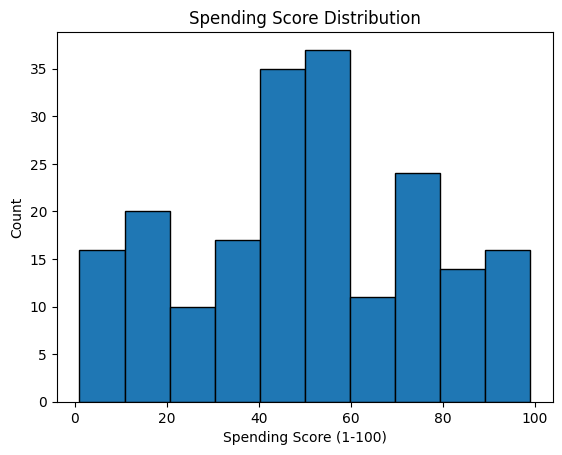

In [76]:
plt.hist(data['Spending Score (1-100)'], bins=10, edgecolor='black')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show()


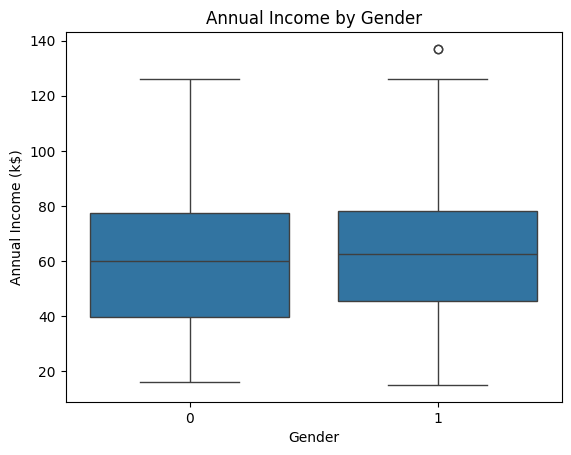

In [77]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data)
plt.title('Annual Income by Gender')
plt.show()


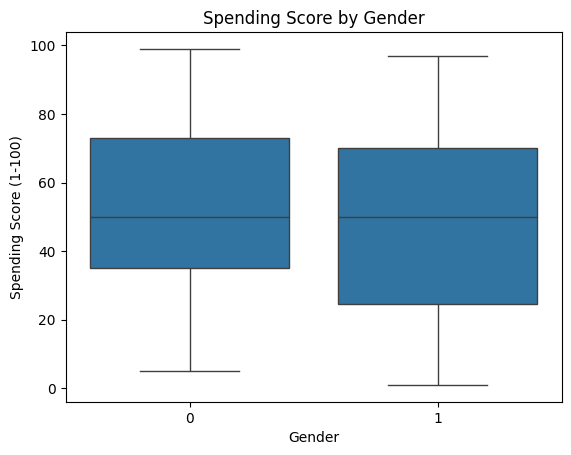

In [78]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data)
plt.title('Spending Score by Gender')
plt.show()

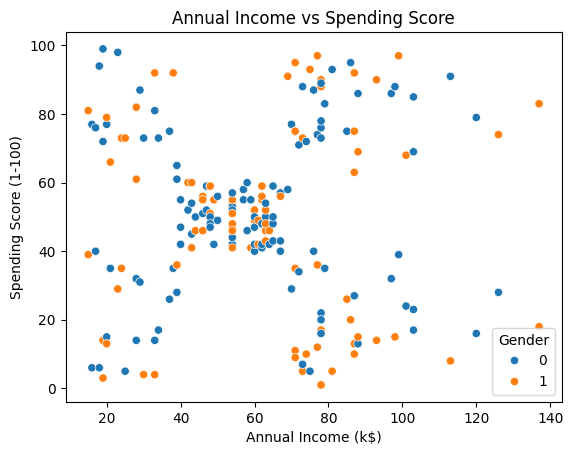

In [79]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Annual Income vs Spending Score')
plt.show()


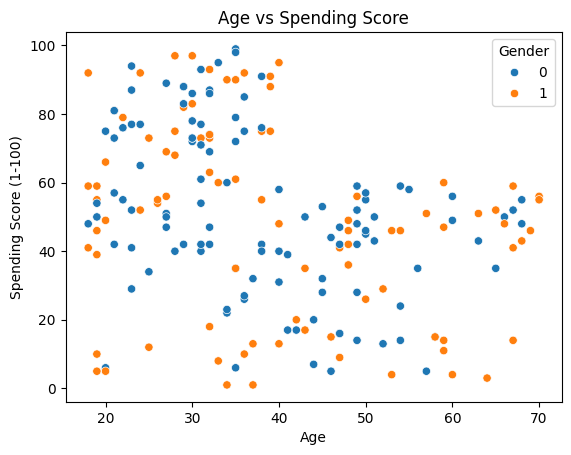

In [80]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Age vs Spending Score')
plt.show()


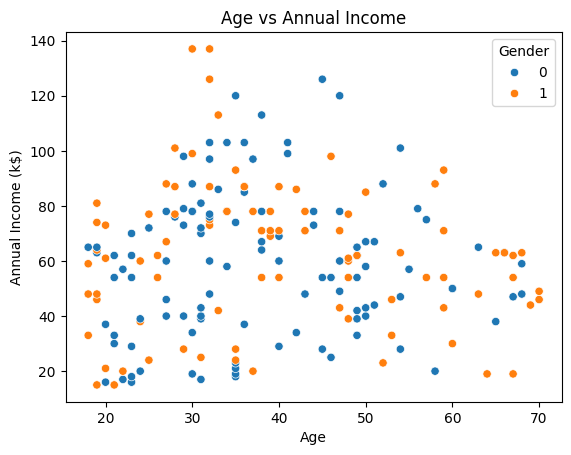

In [81]:
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=data)
plt.title('Age vs Annual Income')
plt.show()


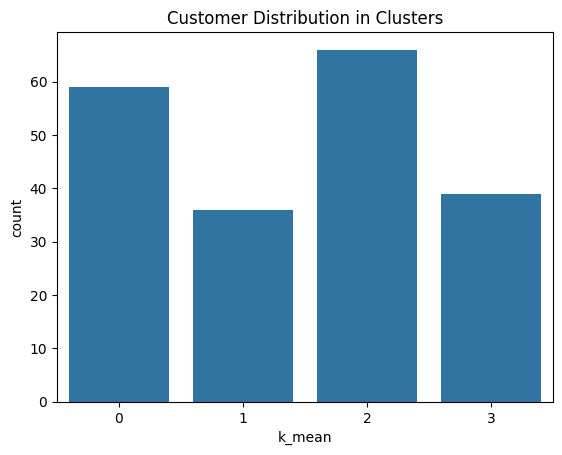

In [82]:
sns.countplot(x='k_mean', data=data)
plt.title('Customer Distribution in Clusters')
plt.show()


In [83]:
data.to_csv('my.csv',index=False)